In [74]:
import os
os.getcwd()
import pandas as pd
import matplotlib.pyplot as plt
import pathlib

In [179]:
root_dir = "/workspace/gfm-gap-filling-baseline/data/results"
results_dir = "subset_400_2023-08-21-22:19:47_uneven_bs16"
checkpoint_dir = pathlib.Path(results_dir)
file_path = root_dir / checkpoint_dir / "log_training.txt"
training_length = results_dir[7:11]

with open(file_path, "r") as file:
    lines = file.readlines()

# Join lines 14 onwards into a single string
start_line = 14
log_string = "".join(lines[start_line - 1 :])

print(log_string[:600])


2023-08-21 22:21:29,177 [INFO    ] epoch   1, train_g_loss: 56.789, train_d_loss:  0.690, train_mse:11.28409576, train_mae: 0.8657, train_ssim:0.46272835, valid_g_loss:  0.323, valid_d_loss:  0.607, valid_mse:0.03747598, valid_mae: 0.1236, valid_ssim:0.72140855
2023-08-21 22:22:58,995 [INFO    ] epoch   2, train_g_loss:  1.289, train_d_loss:  0.470, train_mse:0.13589023, train_mae: 0.2012, train_ssim:0.59264851, valid_g_loss:  1.133, valid_d_loss:  0.082, valid_mse:0.07984325, valid_mae: 0.2338, valid_ssim:0.50545293
2023-08-21 22:24:27,948 [INFO    ] epoch   3, train_g_loss:  1.884, train_d_l


In [180]:

# Split the log into individual lines
log_lines = log_string.strip().split('\n')
for line in log_lines[:3]:
    parts = line.split(',')
    print (parts)

['2023-08-21 22:21:29', '177 [INFO    ] epoch   1', ' train_g_loss: 56.789', ' train_d_loss:  0.690', ' train_mse:11.28409576', ' train_mae: 0.8657', ' train_ssim:0.46272835', ' valid_g_loss:  0.323', ' valid_d_loss:  0.607', ' valid_mse:0.03747598', ' valid_mae: 0.1236', ' valid_ssim:0.72140855']
['2023-08-21 22:22:58', '995 [INFO    ] epoch   2', ' train_g_loss:  1.289', ' train_d_loss:  0.470', ' train_mse:0.13589023', ' train_mae: 0.2012', ' train_ssim:0.59264851', ' valid_g_loss:  1.133', ' valid_d_loss:  0.082', ' valid_mse:0.07984325', ' valid_mae: 0.2338', ' valid_ssim:0.50545293']
['2023-08-21 22:24:27', '948 [INFO    ] epoch   3', ' train_g_loss:  1.884', ' train_d_loss:  0.439', ' train_mse:0.23527601', ' train_mae: 0.2028', ' train_ssim:0.57143092', ' valid_g_loss:  0.993', ' valid_d_loss:  0.136', ' valid_mse:0.05374747', ' valid_mae: 0.1329', ' valid_ssim:0.62111080']


In [181]:
lines = log_string.strip().split('\n')

# Create lists to store statistics for each epoch
timestamps = []
epochs = []
train_g_losses = []
train_d_losses = []
train_mses = []
train_maes = []
train_ssims = []
valid_g_losses = []
valid_d_losses = []
valid_mses = []
valid_maes = []
valid_ssims = []

# Process each line to extract statistics for each epoch
for line in lines:
    # Split the line by commas
    parts = line.split(',')
    
    # Extract epoch number from the 'epoch' part
    epoch = int(parts[1][-4:].strip())
    
    # Extract metrics for the epoch
    metrics = {}
    for part in parts[2:]:
        key, value = part.strip().split(':')
        metrics[key.strip()] = float(value.strip())
    
    # Append statistics to the respective lists
    epochs.append(epoch)
    train_g_losses.append(metrics['train_g_loss'])
    train_d_losses.append(metrics['train_d_loss'])
    train_mses.append(metrics['train_mse'])
    train_maes.append(metrics['train_mae'])
    train_ssims.append(metrics['train_ssim'])
    valid_g_losses.append(metrics['valid_g_loss'])
    valid_d_losses.append(metrics['valid_d_loss'])
    valid_mses.append(metrics['valid_mse'])
    valid_maes.append(metrics['valid_mae'])
    valid_ssims.append(metrics['valid_ssim'])

# Create a dictionary with the extracted statistics
data = {
    "Epoch": epochs,
    "Training Generator Loss": train_g_losses,
    "Training Discriminator Loss": train_d_losses,
    "Training MSE": train_mses,
    "Training MAE": train_maes,
    "Training SSIM": train_ssims,
    "Validation Generator Loss": valid_g_losses,
    "Validation Discriminator Loss": valid_d_losses,
    "Validation MSE": valid_mses,
    "Validation MAE": valid_maes,
    "Validation SSIM": valid_ssims,
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data).head(200)

# Display the DataFrame
print(df.head())

   Epoch  Training Generator Loss  Training Discriminator Loss  Training MSE  \
0      1                   56.789                        0.690     11.284096   
1      2                    1.289                        0.470      0.135890   
2      3                    1.884                        0.439      0.235276   
3      4                    1.502                        0.330      0.156945   
4      5                    1.089                        0.447      0.050602   

   Training MAE  Training SSIM  Validation Generator Loss  \
0        0.8657       0.462728                      0.323   
1        0.2012       0.592649                      1.133   
2        0.2028       0.571431                      0.993   
3        0.1808       0.587752                      0.996   
4        0.1272       0.640090                      0.798   

   Validation Discriminator Loss  Validation MSE  Validation MAE  \
0                          0.607        0.037476          0.1236   
1               

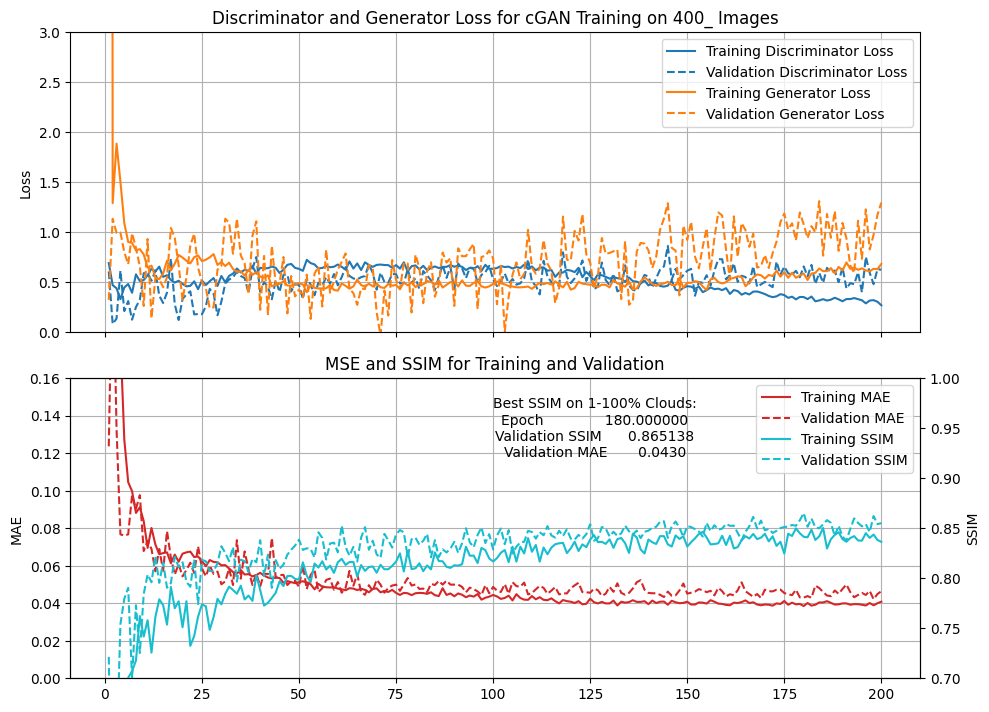

In [182]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plotting D Loss and G Loss for both training and validation
ax1.plot(df["Epoch"], df["Training Discriminator Loss"], color="tab:blue", label="Training Discriminator Loss")
ax1.plot(df["Epoch"], df["Validation Discriminator Loss"], color="tab:blue", linestyle="--", label="Validation Discriminator Loss")
ax1.plot(df["Epoch"], df["Training Generator Loss"], color="tab:orange", label="Training Generator Loss")
ax1.plot(df["Epoch"], df["Validation Generator Loss"], color="tab:orange", linestyle="--", label="Validation Generator Loss")

ax1.set_ylabel("Loss")
ax1.set_ylim(0, 3.0)
ax1.set_title(f"Discriminator and Generator Loss for cGAN Training on {training_length} Images")
plt.suptitle("Best SSIM on 1-100% Clouds:\n" + str(df.iloc[df["Validation SSIM"].idxmax(), [0,-1,-2]])[:87], fontsize=10, y=0.4, x = 0.6)
ax1.legend()
ax1.grid(True)

# Plotting MSE and SSIM on separate y-axes
ax2.plot(df["Epoch"], df["Training MAE"], color="tab:red", label="Training MAE")
ax2.plot(df["Epoch"], df["Validation MAE"], color="tab:red", linestyle="--", label="Validation MAE")
ax2.set_ylabel("MAE")
ax2.set_ylim(0, 0.16)

ax2_2 = ax2.twinx()
ax2_2.plot(df["Epoch"], df["Training SSIM"], color="tab:cyan", label="Training SSIM")
ax2_2.plot(df["Epoch"], df["Validation SSIM"], linestyle="--", color="tab:cyan", label="Validation SSIM")
ax2_2.set_ylabel("SSIM")
ax2_2.set_ylim(0.7, 1.0)

# Adding legend for the second y-axis
lines, labels = ax2.get_legend_handles_labels()
lines2, labels2 = ax2_2.get_legend_handles_labels()
ax2_2.legend(lines + lines2, labels + labels2)

ax2.set_title("MSE and SSIM for Training and Validation")
ax2.grid(True)

# Adjust layout to prevent clipping of labels
plt.tight_layout()
filename = root_dir / checkpoint_dir / 'training_graph.png'
plt.savefig(filename, dpi=300, bbox_inches='tight', format='png')